Árbol de decisión de regresión

Se puede usar un árbol de decisión para la regresión y también para la clasificación.
Para tareas de regresión, los árboles de decisión se entrenan de manera similar a la clasificación pero no predicen una clase, sino un número.

Por ejemplo, Gabriel llegó por fin a Hawái. ¿Cuánto le costará un boleto para el Museo de Arte de Caricaturas?

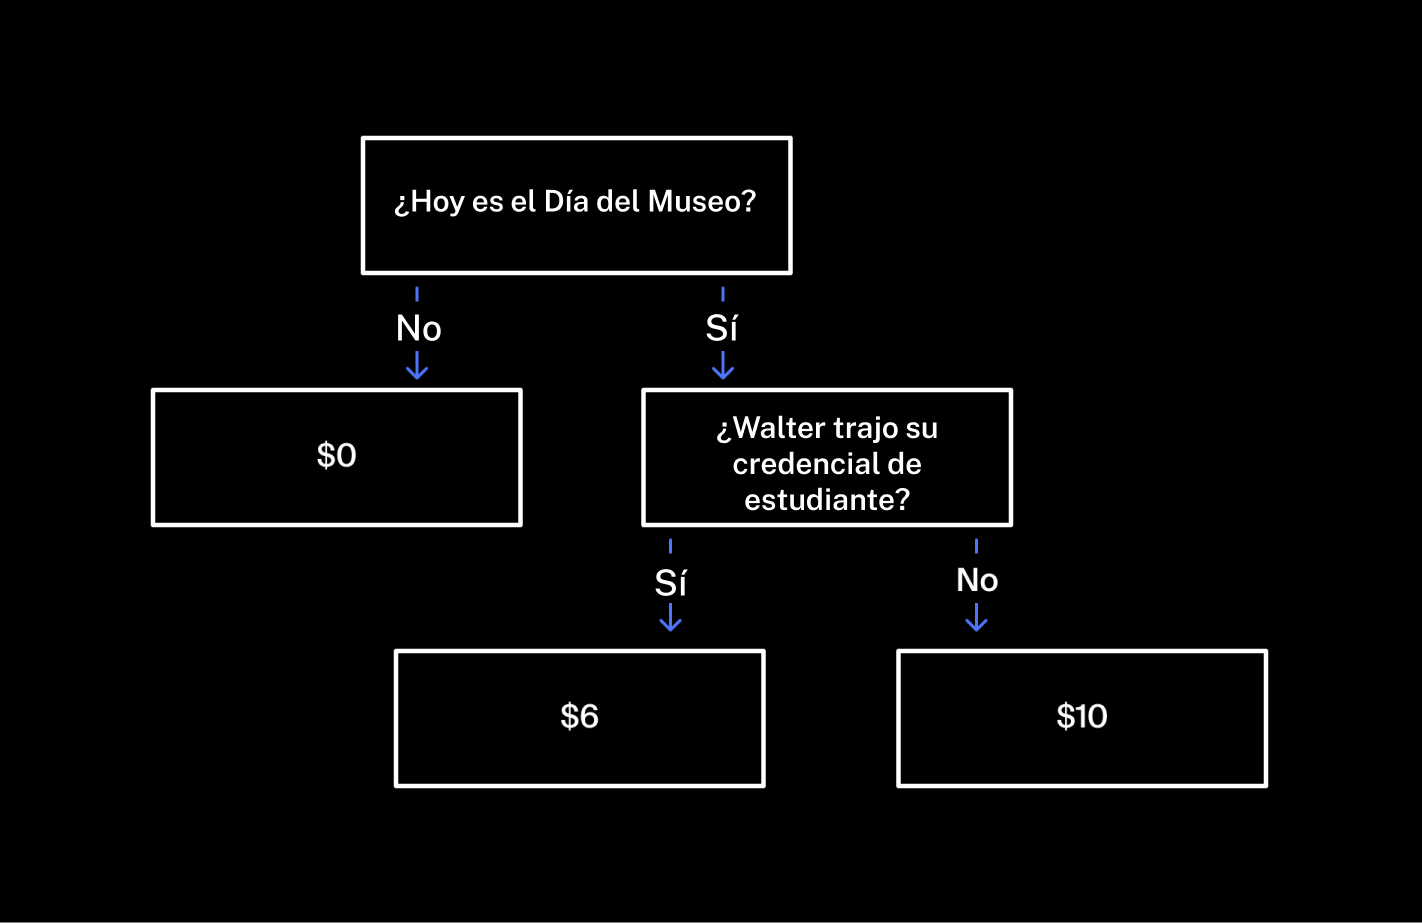



Ejercicio

1. Destina 25% de los datos al conjunto de validación y el resto para el de entrenamiento.
2. Entrena modelos de árbol de decisión para un problema de regresión con diferentes valores de profundidad entre 1 y 5.
3. Calcula el valor de RECM en el conjunto de validación para cada modelo.
4. Almacena en la variable best_model el modelo con el mejor valor de RECM en el conjunto de validación. Para calcular la métrica RECM, toma el valor de la raíz cuadrada del ECM:

¿Es un buen resultado? Comparémoslo con otros modelos. Por lo menos podemos tener la certeza de que nuestro modelo pasó la prueba de cordura.

Para calcular la métrica RECM, toma el valor de la raíz cuadrada del ECM:

mean_squared_error(target_valid, predictions_valid)**0.5

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/datasets/train_data_us.csv')

features = df.drop(['last_price'], axis=1)
target = df['last_price'] / 1000000

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345) # segmenta el 25% de los datos para hacer el conjunto de validación

best_model = None
best_result = 10000
best_depth = 0
for depth in range(1,6): # selecciona el rango del hiperparámetro, el límite superior no se incluye
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)# entrena el modelo en el conjunto de entrenamiento
    model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
    predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
    result = mean_squared_error(target_valid, predictions_valid) ** 0.5# calcula la RECM en el conjunto de validación
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth

print(f"RECM del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_result}")

RECM del mejor modelo en el conjunto de validación (max_depth = 5): 0.1308258643787925

¿Es un buen resultado? Comparémoslo con otros modelos. Por lo menos podemos tener la certeza de que nuestro modelo pasó la prueba de cordura.